# DCS5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import shap
from google.colab import drive, files

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/train (1).csv")
df.shape
df

,ID,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,label
0,0,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,3
1,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,3
2,2,1,1,1,1,0,0,1,1,0,...,1,1,1,1,0,0,0,0,0,3
3,3,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,7
4,4,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,559,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
560,560,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,4
561,561,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10
562,562,1,1,0,0,1,0,1,0,1,...,1,1,1,1,0,0,0,0,0,5


## EDA

<ipython-input-4-63ce8ce8c9e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


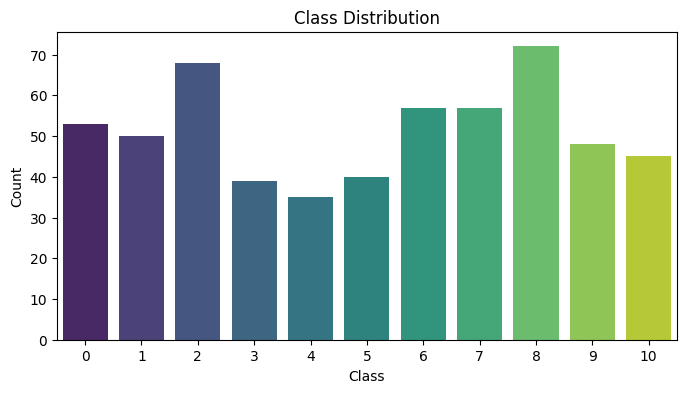

In [4]:
class_counts = df['label'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


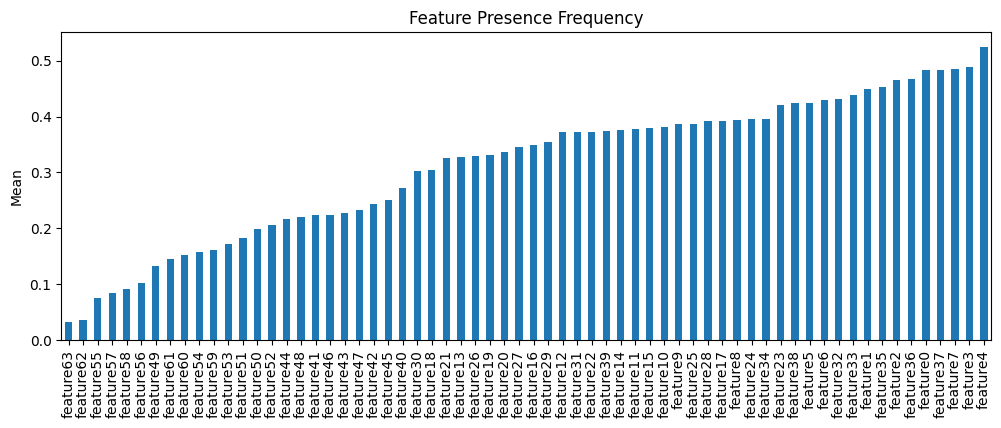

In [5]:
features = [f'feature{i}' for i in range(64)]
freq = df[features].mean().sort_values()
plt.figure(figsize=(12,4))
freq.plot(kind='bar')
plt.title('Feature Presence Frequency')
plt.ylabel('Mean')
plt.show()

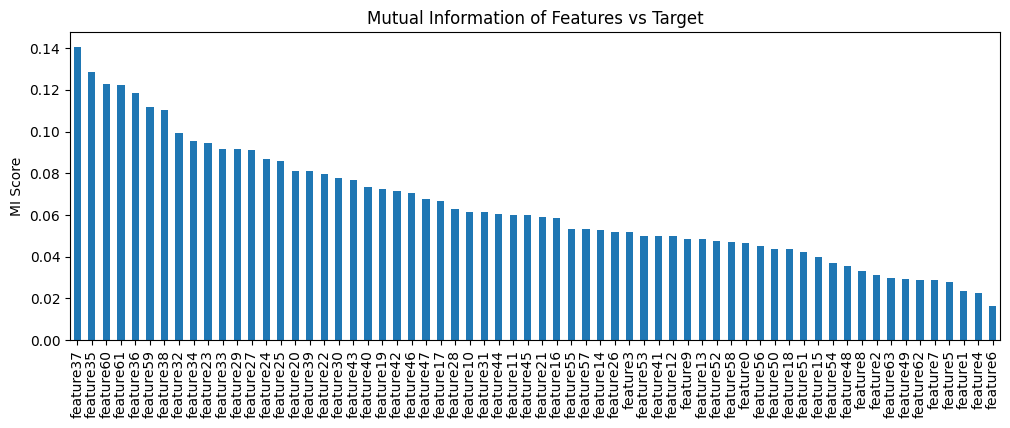

In [6]:
X = df[features]
y = df['label']
mi = mutual_info_classif(X, y, discrete_features=True)
mi_series = pd.Series(mi, index=features).sort_values(ascending=False)
plt.figure(figsize=(12,4))
mi_series.plot(kind='bar')
plt.title('Mutual Information of Features vs Target')
plt.ylabel('MI Score')
plt.show()

In [7]:
df[df.isnull().any(axis=1)]


,ID,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,label


-------------------------------------------------------------------------------------------------

Logistic Regression Accuracy: 0.327
SVM (RBF) Accuracy: 0.372
Decision Tree Accuracy: 0.265
Naive Bayes Accuracy: 0.381
Best RF params: {'max_depth': None, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGB params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Ensemble Accuracy: 0.34513274336283184
Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.00      0.00      0.00        10
           2       0.23      0.21      0.22        14
           3       0.45      0.62      0.53         8
           4       0.50      0.43      0.46         7
           5       0.00      0.00      0.00         8
           6       0.25      0.18      0.21        11
           7       0.64      0.64      0.64        11
           8       0.17      0.07      0.10        14
           9       0.24      0.50      0.32        10
          10       0.25      0.33      0.29         9

    accuracy                           0.35       113
   macro avg       0.30      0.35      0.32       113
weighted avg       0.30      0.35      0.31       113

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  0  1]
 [ 3  0  2  1  0  0  0  3  1  0  0]
 [ 0  1 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

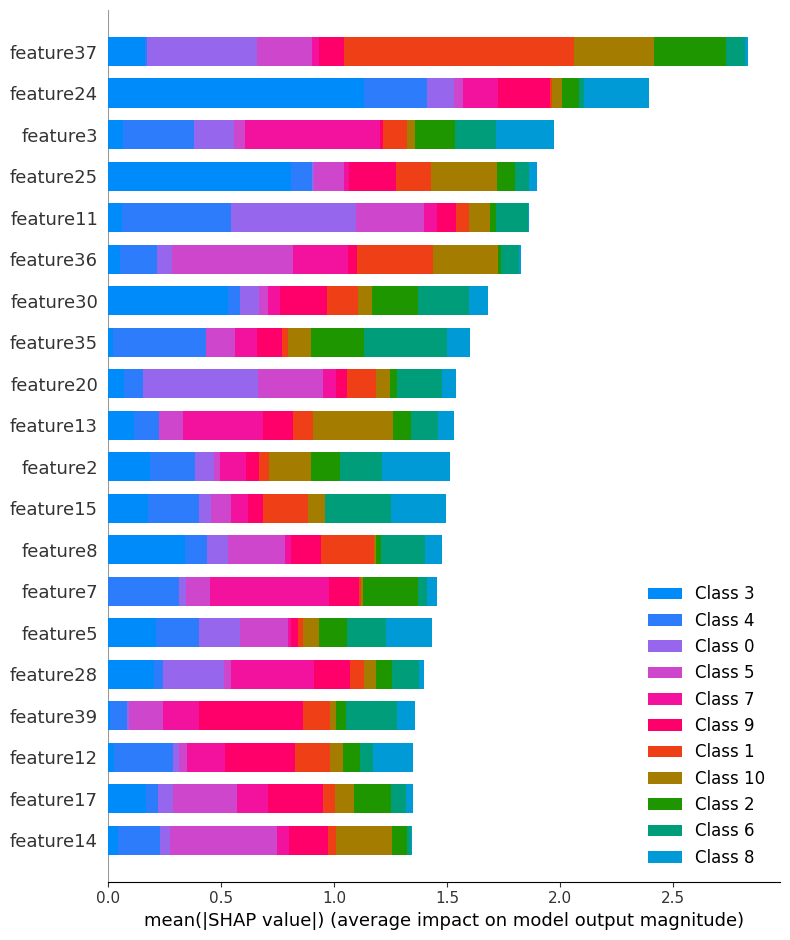

In [8]:

features = [f'feature{i}' for i in range(64)]
X = df[features]
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Scale  for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (RBF)':           SVC(kernel='rbf', probability=True, random_state=42),
    'Decision Tree':       DecisionTreeClassifier(max_depth=5, random_state=42),
    'Naive Bayes':         BernoulliNB()
}

results = {}
for name, model in models.items():
    if name == 'SVM (RBF)':
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    results[name] = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {results[name]:.3f}")

#   Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print('Best RF params:', rf_grid.best_params_)

#  XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
print('Best XGB params:', xgb_grid.best_params_)

#  Voting Ensemble
voting = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('bnb', models['Naive Bayes']),
        ('svm', models['SVM (RBF)']),
        ('dt', models['Decision Tree'])
    ],
    voting='soft'
)

voting.fit(X_train, y_train)

#  Evaluate
ensemble_preds = voting.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print('Voting Ensemble Accuracy:', ensemble_acc)
print('Classification Report for Voting Ensemble:')
print(classification_report(y_test, ensemble_preds))
print('Confusion Matrix:')
print(confusion_matrix(y_test, ensemble_preds))

#  Feature Importance Analyses
#  Random Forest impurity importances
rf_importances = pd.Series(rf_best.feature_importances_, index=features)
print('RF top 5 features:', rf_importances.sort_values(ascending=False).head(5).to_dict())

#  XGBoost gain importances
xgb_importances = pd.Series(xgb_best.get_booster().get_score(importance_type='gain'))
print('XGB top 5 features:', xgb_importances.sort_values(ascending=False).head(5).to_dict())

#  Permutation importance on the ensemble
perm = permutation_importance(voting, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm.importances_mean, index=features)
print('Permutation top 5 features:', perm_importances.sort_values(ascending=False).head(5).to_dict())

#  SHAP values for XGBoost
explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)


test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
X_real = test_df[features]
preds_real = voting.predict(X_real)


submission = pd.DataFrame({
    'ID':    range(len(preds_real)),
    'label': preds_real
})
submission.to_csv('submission.csv', index=False)
print('Generated submission.csv with', len(submission), 'rows.')
files.download('submission.csv')
